<center><h1>Image Recognition</h1></center>

## Imports

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import time
import numpy as np
import tensorflow as tf
import cPickle
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

from scipy.misc import toimage
%matplotlib inline

## Required Functions

In [2]:
def unpickle(file):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict

def to_RGB(x):
    R = x[0:1024].reshape(32, 32)
    G = x[1024:2048].reshape(32, 32)
    B = x[2048:3072].reshape(32, 32)
    return np.dstack((R, G, B))

def load_data():
    Tt_X = np.asarray([]).reshape([0, 32, 32, 3])
    Tt_Y = []
    
    df = "/".join([data_path, 'test_batch'])
    batch = unpickle(df)
    img = batch['data']
    lbl = batch['labels']
    for l in lbl:
        oneh = np.zeros([10])
        oneh[int(l)] = 1
        Tt_Y.append(oneh)
    img = np.asarray([to_RGB(img[i]) for i in range(img.shape[0])])
    Tt_X = np.concatenate((Tt_X, img), axis=0)
    Tt_Y = np.asarray(Tt_Y)
    
    return Tt_X, Tt_Y

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev = 0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)


## Loading Test Data

In [3]:
data_path = "/home/development/ajayanand/tf/aml_project/data"
model = "model/cnn.ckpt"
testX, testY = load_data()

# Normalize Data
testX = testX/255.0

## Model Architecture Definition

In [4]:
# Design Model
X = tf.placeholder(tf.float32, shape=(None, 32, 32, 3))
keep_prob = tf.placeholder(tf.float32)

#CONV_1
W1 = weight_variable([5, 5, 3, 32])
b1 = bias_variable([32])
h1 = tf.nn.relu6(tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')+b1) # 32x32x32

#CONV2
W2 = weight_variable([5, 5, 32, 64])
b2 = bias_variable([64])
in_ = tf.nn.dropout(h1, keep_prob)
h2 = tf.nn.relu6(tf.nn.conv2d(in_, W2, strides = [1, 2, 2, 1], padding='SAME')+b2) # 16x16x64
h2_p = tf.nn.max_pool(h2, ksize=[1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME') # 8x8x64

#CONV3
W3 = weight_variable([5, 5, 64, 128])
b3 = bias_variable([128])
in_ = tf.nn.dropout(h2_p, keep_prob)
h3 = tf.nn.relu6(tf.nn.conv2d(in_, W3, strides = [1, 2, 2, 1], padding='SAME')+b3) # 4x4x128
h3_p = tf.nn.max_pool(h3, ksize=[1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME') # 2x2x128

#FC1
Wf1 = weight_variable([2*2*128, 512])
bf1 = bias_variable([512])
h3_p  = tf.reshape(h3_p, [-1, 2*2*128])
in_ = tf.nn.dropout(h3_p, keep_prob)
f1  = tf.nn.relu6(tf.matmul(in_, Wf1)+bf1)

f1 = tf.nn.dropout(f1, keep_prob)

#FC2
Wf2 = weight_variable([512, 10])
bf2 = bias_variable([10])

y_conv = tf.matmul(f1, Wf2)+bf2

probs = tf.nn.softmax(y_conv)

## Testing Model

In [5]:
classes = {0:'Airplane', 1:'Automobile', 2:'Bird', 3:'Cat', 4:'Deer', 5:'Dog', 6:'Frog', 7:'Horse', 8:'Ship',
           9:'Truck'}
saver = tf.train.Saver()

There are 10000 test images, loaded and stored with index starting from 0. While testing please enter image index in the closed range [0-9999]


Enter test image: 20

Correct:    Horse
Predicted:  Horse


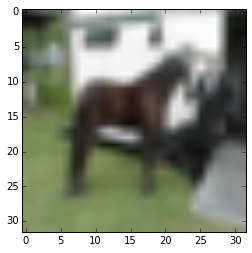

In [6]:
saver = tf.train.Saver()
sess = tf.Session()
saver.restore(sess,model)
print("There are 10000 test images, loaded and stored with index starting from 0. While testing please enter\
 image index in the closed range [0-9999]\n\n")
ti = input("Enter test image: ")
x = testX[ti]
y = classes[np.argmax(testY[ti])]

inp = np.asarray([testX[ti]])
tmp = sess.run([probs] ,{X:inp, keep_prob:1.0})
tmp = np.asarray(tmp)
sess.close()
tmp = np.asarray(tmp)
_y = classes[np.argmax(tmp)]

print("\nCorrect:   ", y)
print("Predicted: ", _y)
plt.imshow(testX[ti])